# Statistical Learning_Applied Statistics 

### Objective:

We want to see if we can dive deep into this data to find some valuable insights from insurance dataset.

### Domain:

Healthcare

### Context:

Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of
customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and
generate value out of such data can be an invaluable skill to have.

### Dataset Description:

The data at hand contains medical costs of people characterized by certain attributes.

### Attribute Information:

* age : age of primary beneficiary
* sex : insurance contractor gender, female, male
* bmi : Body mass index, providing an understanding of body, weights that are relatively high or low relative to        height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* children : Number of children covered by health insurance/Number of dependents
* smoker : Smoking
* region : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges : Individual medical costs billed by health insurance.

## 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd

from scipy import stats 

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid', palette='deep', rc={'figure.figsize':(11,9)})

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os 
print(os.getcwd()) 

C:\Users\Venkatesh K Govindan\PGP-AIML\Project\Residency-2


## 2. Read the data as a data frame

In [3]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3. Perform basic EDA which should include the following and print out your insights at every step.

### 3a. Shape of the data

In [4]:
insurance_df.shape

(1338, 7)

##### * Observe 7 columns and 1338 observations in the data

### 3b. Data type of each attribute

In [5]:
insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

##### * Observe below from the data type of each attribute
###### ---> 'age', 'bmi' and 'charges' are Continuous variables 
###### ---> 'children' is Discrete variable
###### ---> 'sex', 'smoker' and 'region' are Categorical Variables

### 3c. Checking the presence of missing values

In [6]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


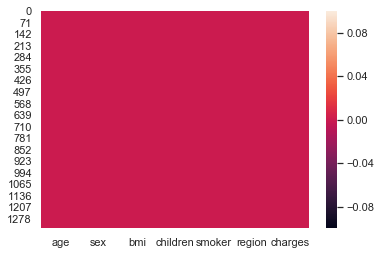

In [7]:
sns.heatmap(insurance_df.isna())

##### * Observe no nulls in data, will validate this

In [8]:
insurance_df.apply(lambda x : sum(x.isna()))

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##### * Observe no missing values in data

### 3d. 5 point summary of numerical attributes

In [9]:
insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


##### * For Age
---> Smallest observation or sample minimun is 18; largest observation or sample maximum is 64.

---> First quartile or Q1 is 27 and third quartile or Q3 is 51; 50% of data distribution is in this range.

---> Mean or sample average is 39.207025 and Median or middle observation is 39; Mean = Median data distibution for age is normal, will verify this seperately. 

---> IQR is 24; 1.5*IQR is 36. Observe no outliers with IQR validation, will verify this seperately.

##### * For BMI
---> Smallest observation or sample minimun is 6.098187; largest observation or sample maximum is 53.13000.

---> First quartile or Q1 is 26.29625 and third quartile or Q3 is 34.693750; 50% of data distribution is in this range.

---> Mean or sample average is 30.663397 and Median or middle observation is 30.400; Mean = Median data distibution for bmi is normal, will verify this seperately. 

---> IQR is 8.3975; 1.5*IQR is 12.59625. Observe outliers beyond upper whisker, will verify this seperately.

##### * For Children
---> Smallest observation or sample minimun is 0; largest observation or sample maximum is 5.

---> First quartile or Q1 is 0 and third quartile or Q3 is 2; 50% of data distribution is in this range.

---> Mean or sample average is 1.094918 and Median or middle observation is 1.000; Mean = Median data distibution for children is normal, will verify this seperately. 

---> IQR is 2; 1.5*IQR is 3. Observe no outliers with IQR validation, will verify this seperately.

##### * For Charges
---> Smallest observation or sample minimun is 1121.8739; largest observation or sample maximum is 63770.42801.

---> First quartile or Q1 is 4740.28715 and third quartile or Q3 is 16639.912515; 50% of data distribution is in this range.

---> Mean or sample average is 13270.422265 and Median or middle observation is 9382.033; Mean > Median data distibution for Charges is skewed towards right, will verify this seperately. 

---> IQR is 11,899.62536; 1.5*IQR is 17,849.438047. Observe outliers beyond upper whisker, will verify this seperately.

### 3e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

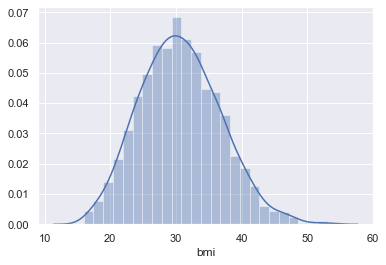

In [11]:
sns.distplot(insurance_df['bmi'])

##### * Observe that data distribution for bmi is normal as we observed when compared mean and median for this column.

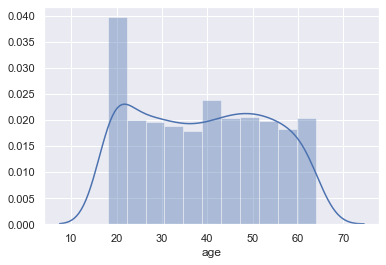

In [12]:
sns.distplot(insurance_df['age'])

##### * Observe that data distribution for age is almost uniform except peak for age group 20 as we observed when compared mean and median for this column.

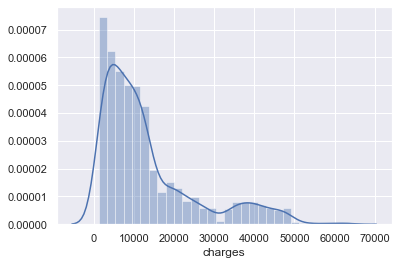

In [13]:
sns.distplot(insurance_df['charges'])

##### * Observe that data distribution for charges is +vely or right skewed as we observed when compared mean and median for this column.

### 3f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [14]:
print('skewness for bmi column:', stats.skew(insurance_df['bmi']))

skewness for bmi column: 0.28372857291709386


##### * Observe value for skewness slightly more than zero and we see slight skewness to right in data distribution.

In [15]:
print('skewness for age column:', stats.skew(insurance_df['age']))

skewness for age column: 0.055610083072599126


##### * Observe value for skewness is near to zero, data distribution is normal.

In [16]:
print('skewness for charges column:', stats.skew(insurance_df['charges']))

skewness for charges column: 1.5141797118745743


##### * Observe positive value for skewness and it is more than zero, data distribution is +vely or right skewed.

### 3g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns

excess kurtosis for bmi column: -0.05502310583700032


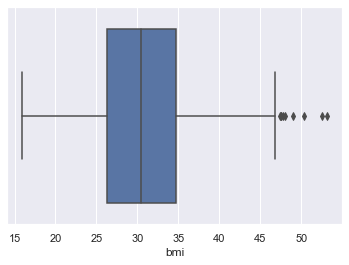

In [17]:
print( 'excess kurtosis for bmi column:', stats.kurtosis(insurance_df['bmi']))
sns.boxplot(insurance_df['bmi'])

##### * Excess kurtosis value is close to zero, indicates a "light tailed" distribution.
##### * Observe data distribution is unform and 50% of data is between bmi range 26 - 35.
##### * Also observe outlier's beyond upper whisker (47.29) as we observed when validated 5 point summary.

excess kurtosis for age column: -1.2449206804584227


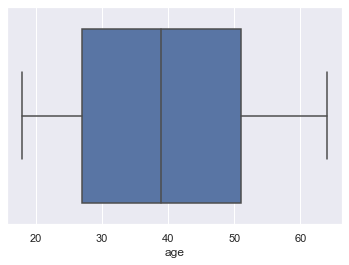

In [18]:
print( 'excess kurtosis for age column:', stats.kurtosis(insurance_df['age']))
sns.boxplot(insurance_df['age'])

##### * Excess kurtosis value is negative, indicates a "light tailed" distribution.
##### * Observe data distribution is normal and no outlier's. 

excess kurtosis for charges column: 1.595821363956751


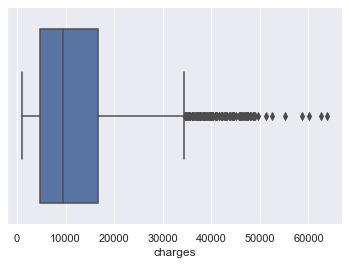

In [19]:
print( 'excess kurtosis for charges column:', stats.kurtosis(insurance_df['charges']))
sns.boxplot(insurance_df['charges'])

##### * Excess kurtosis value is positive, indicates a "heavy tailed" distribution.

##### * Observe data distribution is +vely or right skewed and 75% of data is between charges from range 1000 - 16000.

##### * Also observe outlier's beyond upper whisker (34,489.342985‬) as we observed when validated 5 point summary.¶

### 3h. Distribution of categorical columns (include children)

In [20]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


col_0   count
smoker       
no       1064
yes       274


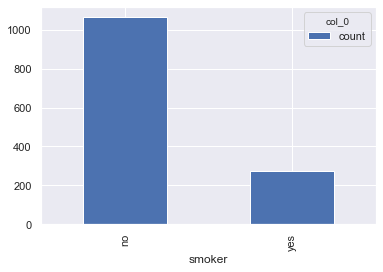

In [21]:
smoker_ct = pd.crosstab(index = insurance_df['smoker'], columns='count')
print(smoker_ct)
smoker_ct.plot.bar()

##### * Observe that around 20% of data is smokers and 80% is non-smokers.

col_0   count
sex          
female    662
male      676


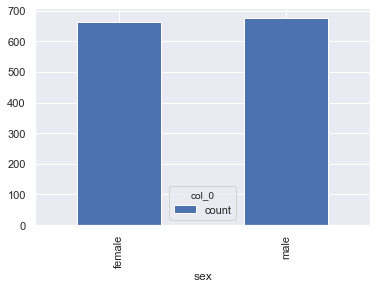

In [22]:
sex_ct = pd.crosstab(index = insurance_df['sex'], columns='count')
print(sex_ct)
sex_ct.plot.bar()

##### * Observe that around 50% of data is female and remaining 50% is male.

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
dtype: int64


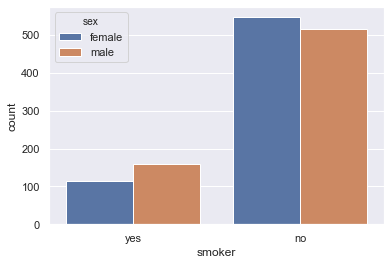

In [23]:
print(insurance_df.groupby(['sex', 'smoker']).size())
sns.countplot(insurance_df['smoker'],hue=insurance_df['sex'])

##### * Observe that data distribution is almost equal with respect to sex and smokers column.

col_0     count
children       
0           574
1           324
2           240
3           157
4            25
5            18


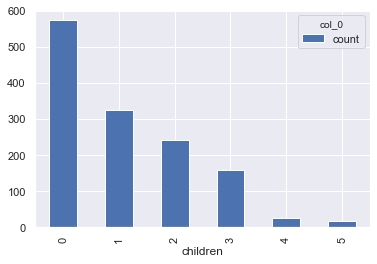

In [24]:
children_ct = pd.crosstab(index = insurance_df['children'], columns='count')
print(children_ct)
children_ct.plot.bar()

##### * Observe that only around 50% of data is having children/dependents, data for # of childrens 4 and 5 is significantly less.

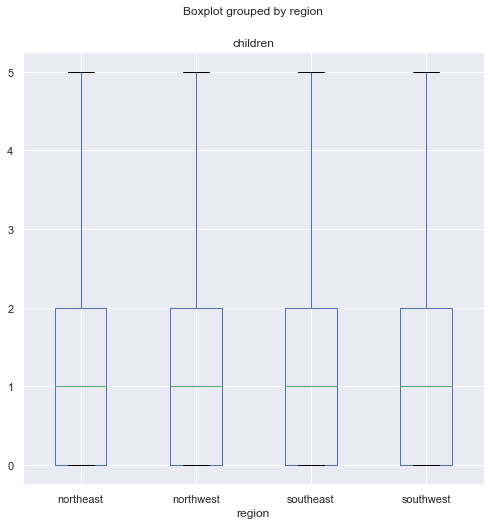

In [25]:
insurance_df.boxplot(column='children', by='region', figsize= (8,8))

##### Observe that data distribution of children/# of dependents are same across all regions.

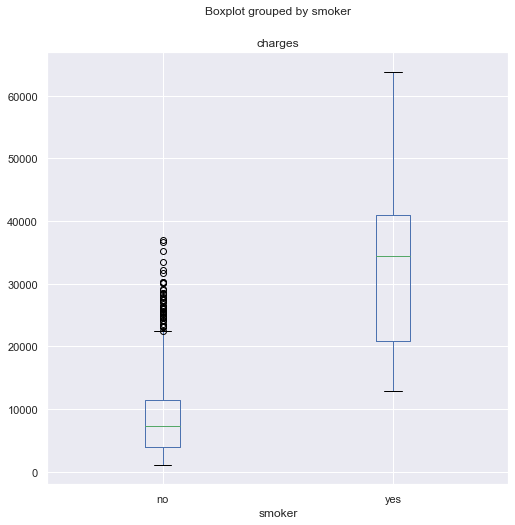

In [26]:
insurance_df.boxplot(column='charges', by= 'smoker', figsize= (8,8))

##### * Observe that charges are more for smokers and distribution is right skewed with no outliers. Also charges are comparatively less for non-smokers and distribution is right skewed with outliers.

region     children
northeast  0           147
           1            77
           2            51
           3            39
           4             7
           5             3
northwest  0           132
           1            74
           2            66
           3            46
           4             6
           5             1
southeast  0           157
           1            95
           2            66
           3            35
           4             5
           5             6
southwest  0           138
           1            78
           2            57
           3            37
           4             7
           5             8
dtype: int64


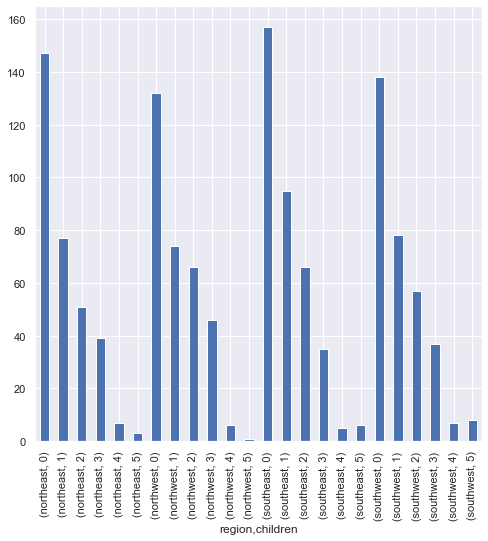

In [27]:
region_children_ct = insurance_df.groupby(['region','children']).size()
print(region_children_ct)
region_children_ct.plot(kind='bar',figsize=(8,8))

##### * Observe that data distribution of children/# of dependents column were same across regions.

### 3i. Pair plot that includes all the columns of the data frame

In [28]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [29]:
insurance_df_dummy = pd.get_dummies(insurance_df, drop_first=True)

In [30]:
insurance_df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
age                 1338 non-null int64
bmi                 1338 non-null float64
children            1338 non-null int64
charges             1338 non-null float64
sex_male            1338 non-null uint8
smoker_yes          1338 non-null uint8
region_northwest    1338 non-null uint8
region_southeast    1338 non-null uint8
region_southwest    1338 non-null uint8
dtypes: float64(2), int64(2), uint8(5)
memory usage: 48.4 KB


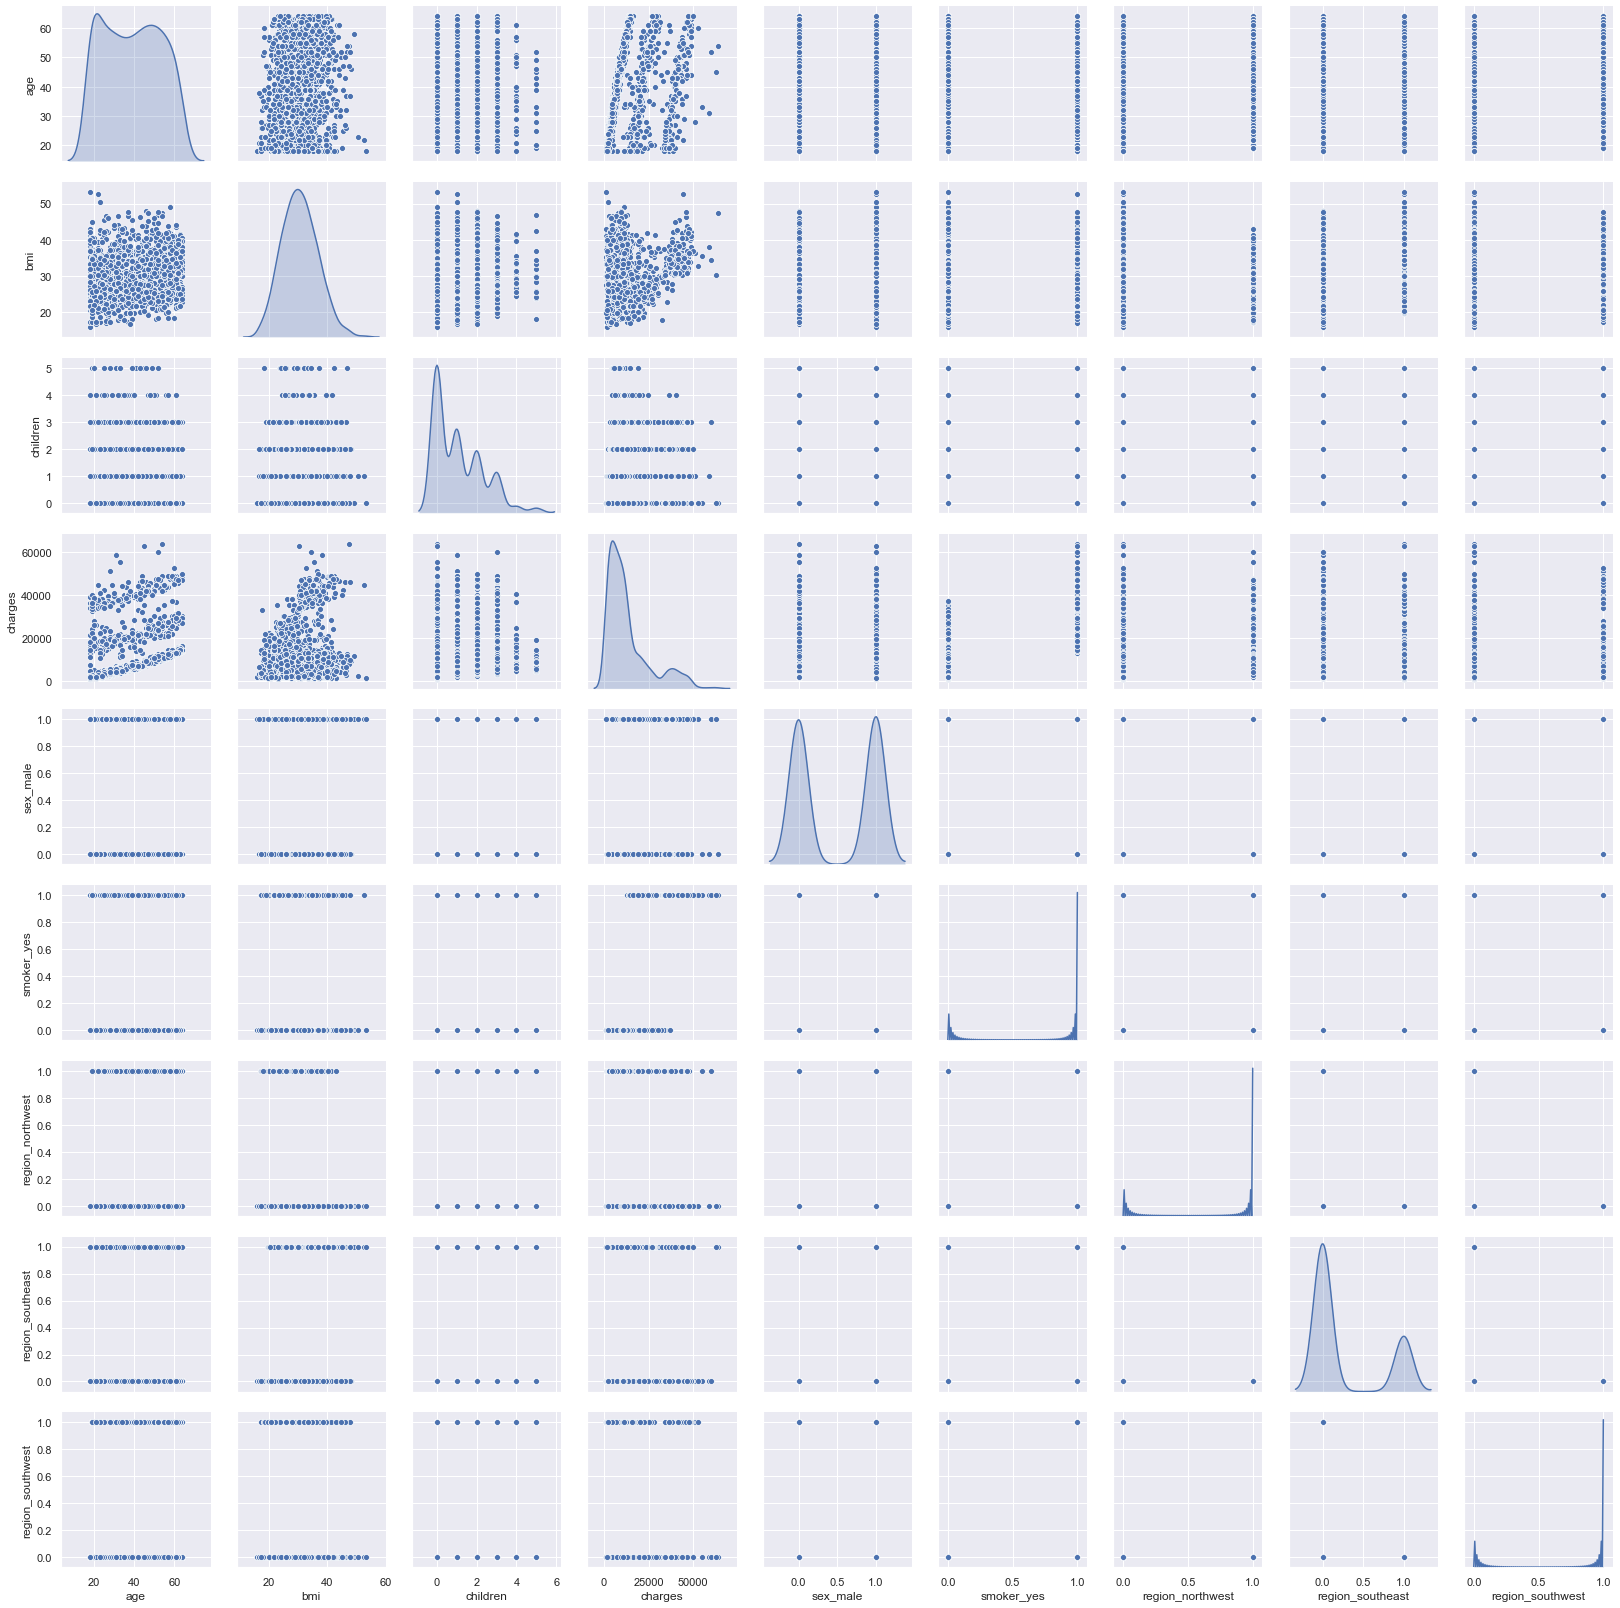

In [31]:
sns.pairplot(insurance_df_dummy,diag_kind='kde')

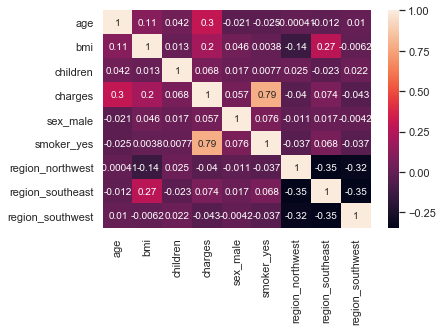

In [32]:
sns.heatmap(insurance_df_dummy.corr(),annot=True)

##### * Observe high correlation between charges and smoker_yes, also from pairplot we can see charges are more for smokers.

## 4. Answer the following questions with statistical evidence

### * Assumption: Confidence Level is 95% and Level of Significance is 5%

In [33]:
confidence_level = 0.95
alpha_1_tail = .05
alpha_2_tail = 0.025

In [34]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 4a. Do charges of people who smoke differ significantly from the people who don't?

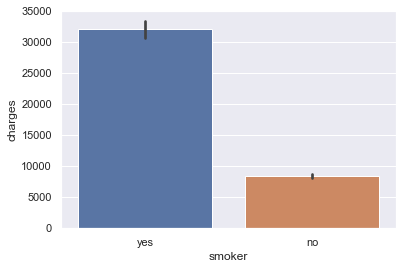

In [35]:
sns.barplot(x='smoker', y='charges', data=insurance_df)

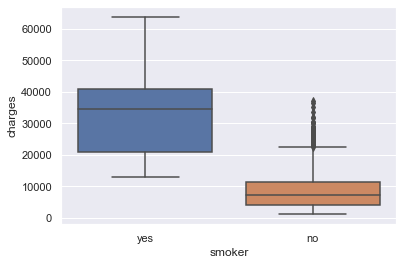

In [36]:
sns.boxplot(x='smoker', y='charges', data=insurance_df)

##### * Observe that charges of people who smoke differ significantly from the non-smokers, will confirm this with two sample t-test.

In [37]:
charge_smoker_no = insurance_df['charges'].where(insurance_df['smoker']=='no')
print(charge_smoker_no.shape)
print(charge_smoker_no.head())
charge_smoker_no.dropna(inplace=True)
print(charge_smoker_no.shape)
print(charge_smoker_no.head())

(1338,)
0            NaN
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64
(1064,)
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64


In [38]:
charge_smoker_no.describe()

count     1064.000000
mean      8434.268298
std       5993.781819
min       1121.873900
25%       3986.438700
50%       7345.405300
75%      11362.887050
max      36910.608030
Name: charges, dtype: float64

In [39]:
charge_smoker_yes = insurance_df['charges'].where(insurance_df['smoker']=='yes')
print(charge_smoker_yes.shape)
print(charge_smoker_yes.head())
charge_smoker_yes.dropna(inplace=True)
print(charge_smoker_yes.shape)
print(charge_smoker_yes.head())

(1338,)
0    16884.924
1          NaN
2          NaN
3          NaN
4          NaN
Name: charges, dtype: float64
(274,)
0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64


In [40]:
charge_smoker_yes.describe()

count      274.000000
mean     32050.231832
std      11541.547176
min      12829.455100
25%      20826.244213
50%      34456.348450
75%      41019.207275
max      63770.428010
Name: charges, dtype: float64

### * Null Hypothesis (H0): there is no significant difference in charges for smokers and non-smokers

### * Alternate Hypothesis (Ha): charges of people who smoke differ significantly from the non-smokers

In [41]:
statistic, pvalue = stats.ttest_ind(charge_smoker_yes, charge_smoker_no)
print('statistic:', statistic)
print('pvalue:', pvalue)

statistic: 46.664921172723716
pvalue: 8.271435842177219e-283


In [42]:
if pvalue < alpha_2_tail:
    print('Test Rejects H0')
else:
    print('Test fails to Reject H0')

Test Rejects H0


### Conclusion:
#### * p-value is less than alpha value, test rejects the null hypothesis at 5% level of significance
#### * so with 95% confidence level, there is significant difference in charges for smokers and non-smokers

### 4b. Does bmi of males differ significantly from that of females?

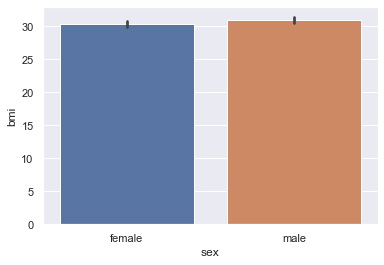

In [43]:
sns.barplot(x='sex', y='bmi', data=insurance_df)

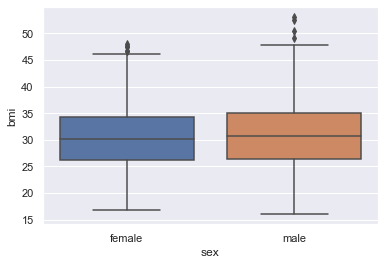

In [44]:
sns.boxplot(x='sex',y='bmi',data=insurance_df)

##### * Observe that bmi of males doesn't differ significantly from that of females, will confirm this with two sample t-test.

In [45]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
bmi_male = insurance_df['bmi'].where(insurance_df['sex']=='male')
print(bmi_male.shape)
print(bmi_male.head())
bmi_male.dropna(inplace=True)
print(bmi_male.shape)
print(bmi_male.head())

(1338,)
0       NaN
1    33.770
2    33.000
3    22.705
4    28.880
Name: bmi, dtype: float64
(676,)
1    33.770
2    33.000
3    22.705
4    28.880
8    29.830
Name: bmi, dtype: float64


In [47]:
print(bmi_male.describe())

count    676.000000
mean      30.943129
std        6.140435
min       15.960000
25%       26.410000
50%       30.687500
75%       34.992500
max       53.130000
Name: bmi, dtype: float64


In [48]:
bmi_female = insurance_df['bmi'].where(insurance_df['sex']=='female')
print(bmi_female.shape)
print(bmi_female.head())
bmi_female.dropna(inplace=True)
print(bmi_female.shape)
print(bmi_female.head())

(1338,)
0    27.9
1     NaN
2     NaN
3     NaN
4     NaN
Name: bmi, dtype: float64
(662,)
0    27.90
5    25.74
6    33.44
7    27.74
9    25.84
Name: bmi, dtype: float64


In [49]:
print(bmi_female.describe())

count    662.000000
mean      30.377749
std        6.046023
min       16.815000
25%       26.125000
50%       30.107500
75%       34.313750
max       48.070000
Name: bmi, dtype: float64


### * Null Hypothesis (Ho) : there is no significant difference in bmi for males and females 
### * Alternate Hypothesis (Ha) :  bmi of males differ significantly from that of females

In [50]:
statistic, pvalue = stats.ttest_ind(bmi_female, bmi_male)
print('statistic:', statistic)
print('pvalue:', pvalue)

statistic: -1.696752635752224
pvalue: 0.08997637178984932


In [51]:
if pvalue < alpha_2_tail:
    print('Test Rejects H0')
else:
    print('Test fails to Reject H0')

Test fails to Reject H0


### * Conclusion:

#### * p-value is greater than alpha value, test fails to rejects the null hypothesis at 5% level of significance

#### * so with 95% confidence level, there is no significant difference in bmi for males and females

### 4c. Is the proportion of smokers significantly different in different genders?

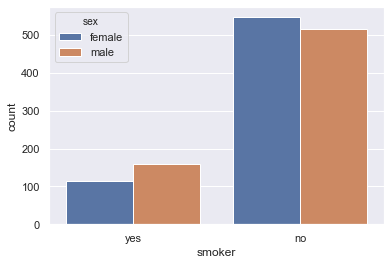

In [52]:
sns.countplot(insurance_df['smoker'],hue=insurance_df['sex'])

In [53]:
smoker_male = insurance_df[(insurance_df['sex']=='male') & (insurance_df['smoker']=='yes')]
print(smoker_male.shape)
print(smoker_male.head())

(159, 7)
    age   sex    bmi  children smoker     region      charges
14   27  male  42.13         0    yes  southeast  39611.75770
19   30  male  35.30         0    yes  southwest  36837.46700
29   31  male  36.30         2    yes  southwest  38711.00000
30   22  male  35.60         0    yes  southwest  35585.57600
34   28  male  36.40         1    yes  southwest  51194.55914


In [54]:
smoker_female = insurance_df[(insurance_df['sex']=='female') & (insurance_df['smoker']=='yes')]
print(smoker_female.shape)
print(smoker_female.head())

(115, 7)
    age     sex    bmi  children smoker     region     charges
0    19  female  27.90         0    yes  southwest  16884.9240
11   62  female  26.29         0    yes  southeast  27808.7251
23   34  female  31.92         1    yes  northeast  37701.8768
58   53  female  22.88         1    yes  southeast  23244.7902
64   20  female  22.42         0    yes  northwest  14711.7438


#### * Observe that proportion of smokers are significantly difference in different gender, will verify this chi square test

### * Null Hypothesis (Ho) : there is no significant difference in proportion of smokers in different genders

### * Alternate Hypothesis (Ha) : proportion is significantly different in different genders

In [55]:
contingency_table=pd.crosstab(insurance_df['sex'],insurance_df['smoker'])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 smoker   no  yes
sex             
female  547  115
male    517  159


In [56]:
print(stats.chi2_contingency(contingency_table))
pvalue = stats.chi2_contingency(contingency_table)[1]
print('p-value is:', pvalue)

(7.39291081459996, 0.006548143503580696, 1, array([[526.43348281, 135.56651719],
       [537.56651719, 138.43348281]]))
p-value is: 0.006548143503580696


In [57]:
if pvalue < alpha_2_tail:
    print('Test Rejects H0')
else:
    print('Test fails to Reject H0')

Test Rejects H0


### * Conclusion:

#### * p-value is less than alpha value, test rejects the null hypothesis at 5% level of significance

#### * so with 95% confidence level, there is significant difference in proportion of smokers in different genders

### 4d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [58]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [59]:
female_0 = insurance_df[(insurance_df['sex']=='female') & (insurance_df['children']==0)]
print(female_0.shape)
print(female_0.head())
bmi_female_0 = female_0['bmi']
print(bmi_female_0.shape)
print(bmi_female_0.head())

(289, 7)
    age     sex    bmi  children smoker     region      charges
0    19  female  27.90         0    yes  southwest  16884.92400
5    31  female  25.74         0     no  southeast   3756.62160
9    60  female  25.84         0     no  northwest  28923.13692
11   62  female  26.29         0    yes  southeast  27808.72510
13   56  female  39.82         0     no  southeast  11090.71780
(289,)
0     27.90
5     25.74
9     25.84
11    26.29
13    39.82
Name: bmi, dtype: float64


In [60]:
print(bmi_female_0.mean(),'\n',bmi_female_0.std())

30.361522491349486 
 5.966934229366254


In [61]:
female_1 = insurance_df[(insurance_df['sex']=='female') & (insurance_df['children']==1)]
print(female_1.shape)
print(female_1.head())
bmi_female_1 = female_1['bmi']
print(bmi_female_1.shape)
print(bmi_female_1.head())

(158, 7)
    age     sex    bmi  children smoker     region     charges
6    46  female  33.44         1     no  southeast   8240.5896
16   52  female  30.78         1     no  northeast  10797.3362
21   30  female  32.40         1     no  southwest   4149.7360
23   34  female  31.92         1    yes  northeast  37701.8768
58   53  female  22.88         1    yes  southeast  23244.7902
(158,)
6     33.44
16    30.78
21    32.40
23    31.92
58    22.88
Name: bmi, dtype: float64


In [62]:
print(bmi_female_1.mean(),'\n',bmi_female_1.std())

30.05265822784811 
 5.786831048981313


In [63]:
female_2 = insurance_df[(insurance_df['sex']=='female') & (insurance_df['children']==2)]
print(female_2.shape)
print(female_2.head())
bmi_female_2 = female_2['bmi']
print(bmi_female_2.shape)
print(bmi_female_2.head())

(119, 7)
    age     sex     bmi  children smoker     region      charges
27   55  female  32.775         2     no  northwest  12268.63225
41   31  female  36.630         2     no  southeast   4949.75870
43   37  female  30.800         2     no  southeast   6313.75900
46   18  female  38.665         2     no  northeast   3393.35635
51   21  female  33.630         2     no  northwest   3579.82870
(119,)
27    32.775
41    36.630
43    30.800
46    38.665
51    33.630
Name: bmi, dtype: float64


In [64]:
print(bmi_female_2.mean(),'\n',bmi_female_2.std())

30.64978991596637 
 6.628199943377461


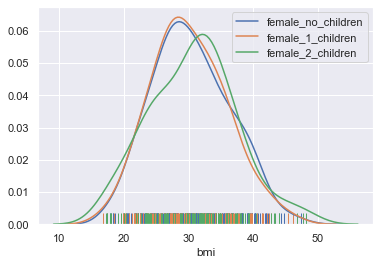

In [65]:
sns.distplot(bmi_female_0, hist=False, rug=True, label='female_no_children')
sns.distplot(bmi_female_1, hist=False, rug=True, label='female_1_children')
sns.distplot(bmi_female_2, hist=False, rug=True, label='female_2_children')

#### * Observe that distribution of bmi across women with no children, 1 child and 2 children are almost similar; will verify this ANOVA test

### * Null Hypothesis (Ho) : distribution of bmi is same across women with no children, 1 child and 2 children

### * Alternate Hypothesis (Ha) : distribution is not same

In [66]:
print(stats.f_oneway(bmi_female_0, bmi_female_1, bmi_female_2))
pvalue = stats.f_oneway(bmi_female_0, bmi_female_1, bmi_female_2)[1]
print('p-value is:', pvalue)

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)
p-value is: 0.7158579926754841


In [67]:
if pvalue < alpha_1_tail:
    print('Test Rejects H0')
else:
    print('Test fails to Reject H0')

Test fails to Reject H0


### * Conclusion:

#### * p-value is greater than alpha value, test fails to rejects the null hypothesis at 5% level of significance

#### * so with 95% confidence level, distributions of bmi is same across women with no children, 1 child and 2 children